In [1]:
import numpy as np
import matplotlib.pyplot as plt
from nnfs.datasets import spiral_data
import nnfs

nnfs.init()

In [2]:
from model.optimizers.adam import OptimizerAdam
from model.loss.binary_crossentropy import BinaryCrossentropy
from model.layers.dense import DenseLayer
from model.loss.mean_squared_error import MeanSquaredError

In [4]:
x, y = nnfs.datasets.sine_data()

dense1 = DenseLayer(64, 1, activation='Relu')
dense2 = DenseLayer(64, 64, activation='Relu')
dense3 = DenseLayer(1, 64)

loss_function = MeanSquaredError()
optimizer = OptimizerAdam(learning_rate=0.005, decay=1e-3)
accuracy_precision = np.std(y) / 250

for epoch in range(10001):
    dense1_outputs = dense1.forward(x)
    dense2_outputs = dense2.forward(dense1_outputs)
    dense3_outputs = dense3.forward(dense2_outputs)

    data_loss = loss_function.calculate(dense3_outputs, y)
    regularization_loss = loss_function.regularization_loss(dense1) + loss_function.regularization_loss(dense2) + loss_function.regularization_loss(dense3)
    loss = data_loss + regularization_loss

    accuracy = np.mean(np.absolute(dense3_outputs - y) < accuracy_precision)

    if not epoch % 100:
        print(f'epoch: {epoch}, '
              f'loss: {loss:.3f}, '
              f'accuracy: {accuracy:.3f}, '
              f'lr: {optimizer.current_learning_rate:.5f}')

    loss_outputs = loss_function.backward(dense3_outputs, y)
    dense3_inputs_prime = dense3.backward(loss_outputs)
    dense2_inputs_prime = dense2.backward(dense3_inputs_prime)
    dense1_inputs_prime = dense1.backward(dense2_inputs_prime)

    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.update_params(dense3)
    optimizer.post_update_params()

epoch: 0, loss: 0.500, accuracy: 0.002, lr: 0.00500
epoch: 100, loss: 0.080, accuracy: 0.007, lr: 0.00455
epoch: 200, loss: 0.043, accuracy: 0.013, lr: 0.00417
epoch: 300, loss: 0.031, accuracy: 0.208, lr: 0.00385
epoch: 400, loss: 0.031, accuracy: 0.426, lr: 0.00357
epoch: 500, loss: 0.031, accuracy: 0.429, lr: 0.00334
epoch: 600, loss: 0.031, accuracy: 0.485, lr: 0.00313
epoch: 700, loss: 0.031, accuracy: 0.092, lr: 0.00294
epoch: 800, loss: 0.031, accuracy: 0.520, lr: 0.00278
epoch: 900, loss: 0.031, accuracy: 0.530, lr: 0.00263
epoch: 1000, loss: 0.031, accuracy: 0.530, lr: 0.00250
epoch: 1100, loss: 0.031, accuracy: 0.496, lr: 0.00238
epoch: 1200, loss: 0.031, accuracy: 0.532, lr: 0.00227
epoch: 1300, loss: 0.031, accuracy: 0.524, lr: 0.00217
epoch: 1400, loss: 0.031, accuracy: 0.533, lr: 0.00208
epoch: 1500, loss: 0.031, accuracy: 0.529, lr: 0.00200
epoch: 1600, loss: 0.031, accuracy: 0.535, lr: 0.00192


KeyboardInterrupt: 

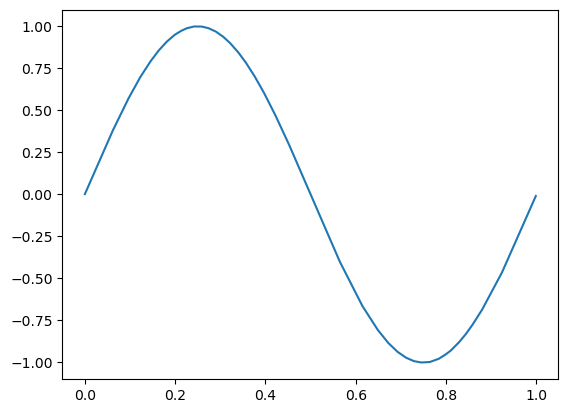

In [4]:
x_test, y_test = nnfs.datasets.sine_data()

dense1_outputs = dense1.forward(x_test)
dense2_outputs = dense2.forward(dense1_outputs)
dense3_outputs = dense3.forward(dense2_outputs)

plt.plot(x_test, dense3_outputs)
plt.show()